In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.cm as cm
import os 
import seaborn as sns
import glob
import natsort

In [4]:
import seaborn as sns
import copy

def load_data(save_path):
    datas = list()
    path_list = glob.glob(save_path)
    path_list = natsort.natsorted(path_list)
    data_temp = get_concat_glob(path_list)
    data_temp["a1"] = data_temp["a1"] * 100
    data_temp["a3"] = data_temp["a3"] * 100
    data_temp['Distribution'] = data_temp['distribution'] .map({0: "IID partition", 
                                                                0.3: "Non-IID partition (α=0.3)"})
    return data_temp

In [5]:
def get_concat_glob(paths):
    data_ = []
    for i, path in enumerate(paths):


        # =====================================
        if "GGU" in path: continue
        if "GU112" in path: continue
        if "GU211" in path: continue

        if "EP10" not in path: continue
        # =====================================

       
        data = pd.read_csv(path)
        data["Mode"] = data["mode"]
        data["Scaling"] = "Vanilla"
        data["n_epochs"] = 5

        if "Output_GU" in path and "_GU111" in path and "LR" in path:
            data["Scaling"] = "GU" + path.split("Output_GU")[1].split("_GU")[1].split("/")[0] 
            continue
        elif "_GU111" in path: 
            try:
                number = float(path.split("Output_GU")[1].split("_GU")[1][:6])
            except:
                number = float(path.split("Output_GU")[1].split("_GU")[1][:5])
            data["Scaling"] = "GU" + str(number)

        if "EP10" in path: data["n_epochs"] = 10
        
        if len(data_) == 0: data_ = data
        else: data_ = pd.concat([data_, data])
    return data_

## BarPlot

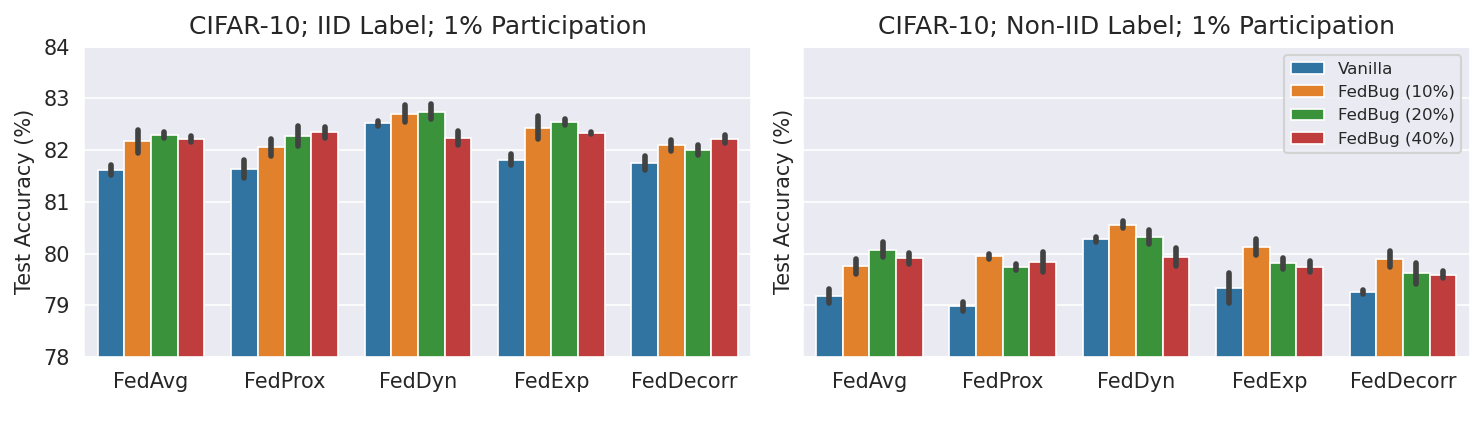

In [14]:
data_temp = load_data("../Output_GU_C10_M9/CIFAR10-*-N100-*/s[1-9].csv")
# data_temp2 = load_data("../Output_GU_C10_M9/OLD/CIFAR10-*-N100-*/s[1-9].csv")
# data_temp = pd.concat([data_temp, data_temp2])

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3), dpi=150, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0., 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.01]
        temp = temp[temp["n_epochs"] == 10]
        temp = temp[(temp["epoch"] == 599)]
        if iid == 0.: 
            temp = temp[(temp["Distribution"] == "IID partition")]
            title = "CIFAR-10; IID Label; 1% Participation"
        elif iid == 0.3: 
            temp = temp[(temp["Distribution"] != "IID partition")]
            title = "CIFAR-10; Non-IID Label; 1% Participation"
        if True:
            replace_icon =   {"GU111.02": "FedBug (10%)", 
                              "GU111.04": "FedBug (20%)", 
                              "GU111.08": "FedBug (40%)",
                            }
            sk = ["Vanilla"] + list(replace_icon.keys())
            temp = temp.set_index('Scaling').loc[sk].reset_index().replace({"Scaling": replace_icon})
            replace_icon =   {"fedavg": "FedAvg", 
                            "fedprox":"FedProx", 
                            "feddyn": "FedDyn", 
                            "fedexp": "FedExp", 
                            "feddecorr": "FedDecorr", }
            temp = temp.set_index('Mode').loc[replace_icon.keys()].reset_index().replace({"Mode": replace_icon})
            ax = sns.barplot(data=temp, x="Mode", y="a3", ax=ax, hue="Scaling",palette="tab10", errorbar="se", linewidth = 0.8)
            ax.set_ylim([78, 84])          
            ax.set_ylabel("Test Accuracy (%)"), ax.set_xlabel(" "), ax.set_title(title)
    axes[0].get_legend().remove()
    axes[1].legend(loc=1, prop={'size': 8})
    fig.tight_layout() 
    plt.savefig("../SaveFig/exp_C10_P001.pdf")
    plt.pause(0.1)

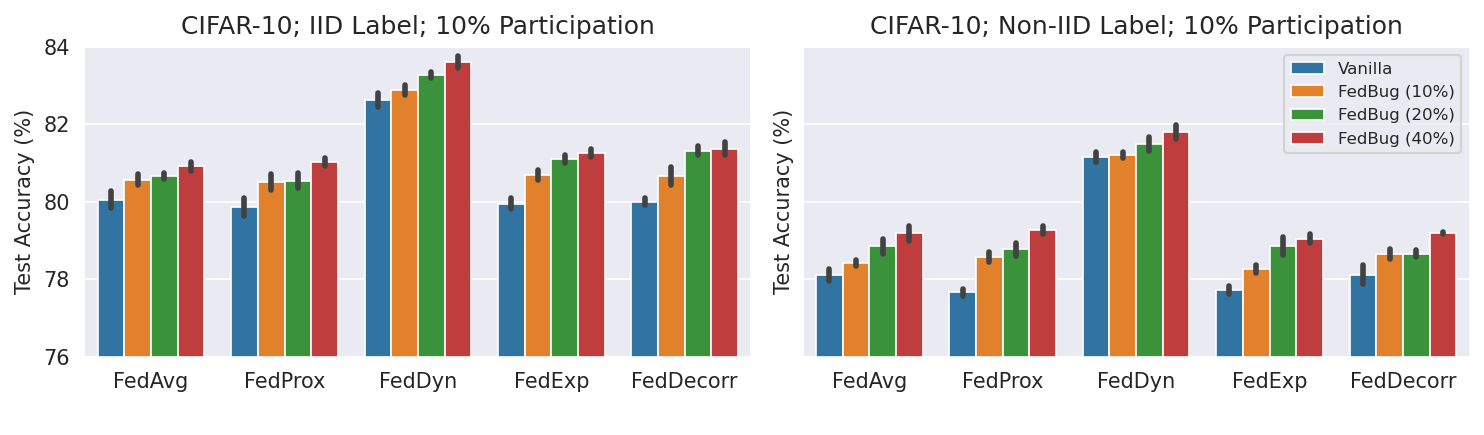

In [16]:
data_temp = load_data("../Output_GU_C10_M9/CIFAR10-*-N100-*/s[1-9].csv")
data_temp2 = load_data("../Output_GU_C10_M9/OLD/CIFAR10-*-N100-*/s[1-9].csv")
data_temp = pd.concat([data_temp, data_temp2])

for algo in ["fedavg"]:
    fig, axes = plt.subplots(1, 2, figsize=(10, 3), dpi=150, sharey=True)
    sns.set_style("darkgrid")
    for index, name, iid in zip(range(2), [algo, algo], [0., 0.3]):        
        ax = axes[index]
        temp = copy.deepcopy(data_temp)
        temp = temp[temp["act_prob"] == 0.1]
        temp = temp[temp["n_epochs"] == 10]
        temp = temp[temp["epoch"] == 299]

        if iid == 0.: 
            temp = temp[(temp["Distribution"] == "IID partition")]
            title = "CIFAR-10; IID Label; 10% Participation"
        elif iid == 0.3: 
            temp = temp[(temp["Distribution"] != "IID partition")]
            title = "CIFAR-10; Non-IID Label; 10% Participation"

        replace_icon =   {
                          "GU111.02": "FedBug (10%)",
                          "GU111.04": "FedBug (20%)",
                          "GU111.08": "FedBug (40%)",
                        #   "GU111.16": "+ FedBug (80%)",
                         }
        sk = ["Vanilla"] + list(replace_icon.keys())
        temp = temp.set_index('Scaling').loc[sk].reset_index().replace({"Scaling": replace_icon})
        replace_icon =   {"fedavg": "FedAvg", 
                          "fedprox":"FedProx", 
                          "feddyn": "FedDyn", 
                          "fedexp": "FedExp", 
                          "feddecorr": "FedDecorr", }
        temp = temp.set_index('Mode').loc[replace_icon.keys()].reset_index().replace({"Mode": replace_icon})
        ax = sns.barplot(data=temp, x="Mode", y="a3", ax=ax, hue="Scaling",palette="tab10", errorbar="se", linewidth = 0.8)
        ax.set_ylim([76, 84])
        ax.set_ylabel("Test Accuracy (%)"), ax.set_xlabel(" "), ax.set_title(title)
    axes[0].get_legend().remove()
    axes[1].legend(loc=1, prop={'size': 8})
    fig.tight_layout() 
    plt.savefig("../SaveFig/exp_C10_P01.pdf")
    plt.pause(0.1)